# Example 1. A Rankine cycle with CoolProp.

First, take an initial look at this notebook. Then, use "Kernel-> Restart & Run All" to re-evaluate the entire notebook. Running this notebook is a good test for your Python installation. 

As a test for CoolProp, we plot the water saturation curve on a T-s diagram, as well as a classic Rankine cycle, between 80 bar and 80 mbar.

No more details will be given here. This will be done in the *Thermodynamique & Phénomènes de transport* course!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp
from CoolProp.CoolProp import PropsSI
print('CoolProp version:', CoolProp.__version__)

CoolProp version: 6.3.0


In [2]:
Npts=400

In [3]:
pcrit = PropsSI('water','Pcrit')
Tcrit = PropsSI('water','Tcrit')
vcrit = 1./PropsSI('water','RHOCRIT')
ptriple = PropsSI('water','ptriple')
Ttriple = PropsSI('water','Ttriple')

In [4]:
Tstart = 283.15
Tend = Tcrit
sat_T = np.linspace(Tstart,Tend,Npts)[:-1]

In [5]:
sat_s0 = PropsSI('S','T',sat_T,'Q',0.0,'water')
sat_s1 = PropsSI('S','T',sat_T,'Q',1.0,'water')

In [6]:
Scrit = (sat_s0[-1]+sat_s1[-1])/2.0

Text(0.5, 1.0, 'Saturation curve for water')

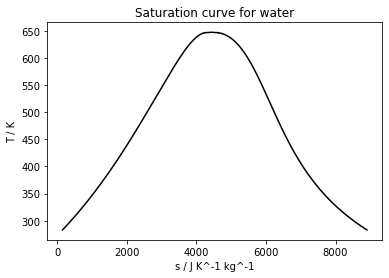

In [7]:
plt.plot(sat_s0,sat_T,'k')
plt.plot(sat_s1,sat_T,'k')
plt.plot([sat_s0[-1],Scrit,sat_s1[-1]],[sat_T[-1],Tcrit,sat_T[-1]],'k')
plt.ylabel('T / K')
plt.xlabel('s / J K^-1 kg^-1')
plt.title('Saturation curve for water')

In [8]:
# fix states
# state 1
p1=8.0e6
# version with sat. vapour ("real Rankine")
x1 = 1.0
h1=PropsSI('H','P',p1,'Q',x1,'water')
s1=PropsSI('S','P',p1,'Q',x1,'water')
T1=PropsSI('T','P',p1,'Q',x1,'water')

# state 2
p2=8.0e3
s2=s1
h2=PropsSI('H','P',p2,'S',s2,'water')
T2=PropsSI('T','P',p2,'S',s2,'water')
x2=PropsSI('Q','P',p2,'S',s2,'water')

# state 3
p3=p2
x3=0.0
h3=PropsSI('H','P',p3,'Q',x3,'water')
s3=PropsSI('S','P',p3,'Q',x3,'water')
T3=PropsSI('T','P',p3,'Q',x3,'water')

# state 4
p4=p1
s4=s3
h4=PropsSI('H','P',p4,'S',s4,'water')
T4=PropsSI('T','P',p4,'S',s4,'water')
x4=PropsSI('Q','P',p4,'S',s4,'water')

Text(0.5, 1.0, 'Rankine cycle with water')

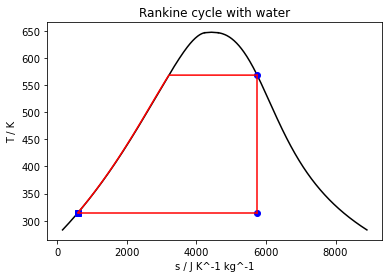

In [9]:
# plot saturation curve again
plt.plot(sat_s0,sat_T,'k')
plt.plot(sat_s1,sat_T,'k')
plt.plot([sat_s0[-1],Scrit,sat_s1[-1]],[sat_T[-1],Tcrit,sat_T[-1]],'k')
plt.ylabel('T / K')
plt.xlabel('s / J K^-1 kg^-1')

# plot states
plt.plot(s1,T1,'bo')
plt.plot(s2,T2,'bo')
plt.plot(s3,T3,'bs')
plt.plot(s4,T4,'bo')

# plot processes
##isentrope s1-s2
plt.plot([s1,s2],[T1,T2],'r')
##isobar s2-s3
s_isobar = np.linspace(s2,s3,Npts)
T_isobar = PropsSI('T','S',s_isobar,'P',p3,'water')
plt.plot(s_isobar,T_isobar,'r')
##isobar s4->s1
s_isobar = np.linspace(s4,s1,Npts)
T_isobar = PropsSI('T','S',s_isobar,'P',p4,'water')
plt.plot(s_isobar,T_isobar,'r')
plt.title('Rankine cycle with water')

In [10]:
# calculate thermodynamic efficiency
eta = (-(h2-h1)-(h4-h3))/(h1-h4)
print("heat-to-work conversion efficiency: {0:4.1f} %".format(eta*100))

heat-to-work conversion efficiency: 37.1 %


## End.